---
### MACD (Moving Average Convergence Divergence)
El MACD es un indicador de análisis técnico que se utiliza para identificar cambios en la tendencia de un precio de activo financiero. Se calcula restando la media móvil exponencial (EMA, por sus siglas en inglés) de 26 períodos de la EMA de 12 períodos. Luego, se traza una EMA de 9 períodos del resultado, que se utiliza como la línea de señal.

Cuando la línea MACD cruza por encima de la línea de señal, se considera una señal alcista, lo que sugiere que el precio del activo puede subir en el futuro cercano. Por otro lado, cuando la línea MACD cruza por debajo de la línea de señal, se considera una señal bajista, lo que sugiere que el precio del activo puede caer en el futuro cercano.

---

El histograma del MACD es una representación gráfica de la diferencia entre la línea MACD y la señal MACD. El histograma es un indicador de momentum que muestra la relación entre estas dos líneas.

Cuando el histograma está por encima de la línea cero, es una señal alcista, lo que significa que el momentum alcista está aumentando. Por otro lado, cuando el histograma está por debajo de la línea cero, es una señal bajista, lo que significa que el momentum bajista está aumentando.

Además, la forma en que el histograma del MACD se mueve con respecto a la línea cero también puede ser una señal importante. Cuando el histograma se acerca a cero desde arriba, puede ser una señal de que la tendencia alcista se está debilitando. Por el contrario, cuando el histograma se acerca a cero desde abajo, puede ser una señal de que la tendencia bajista se está debilitando.

En resumen, el histograma del MACD es una herramienta útil para evaluar el momentum de una acción y puede proporcionar señales de compra y venta cuando se utiliza junto con la línea MACD y la señal MACD.

---

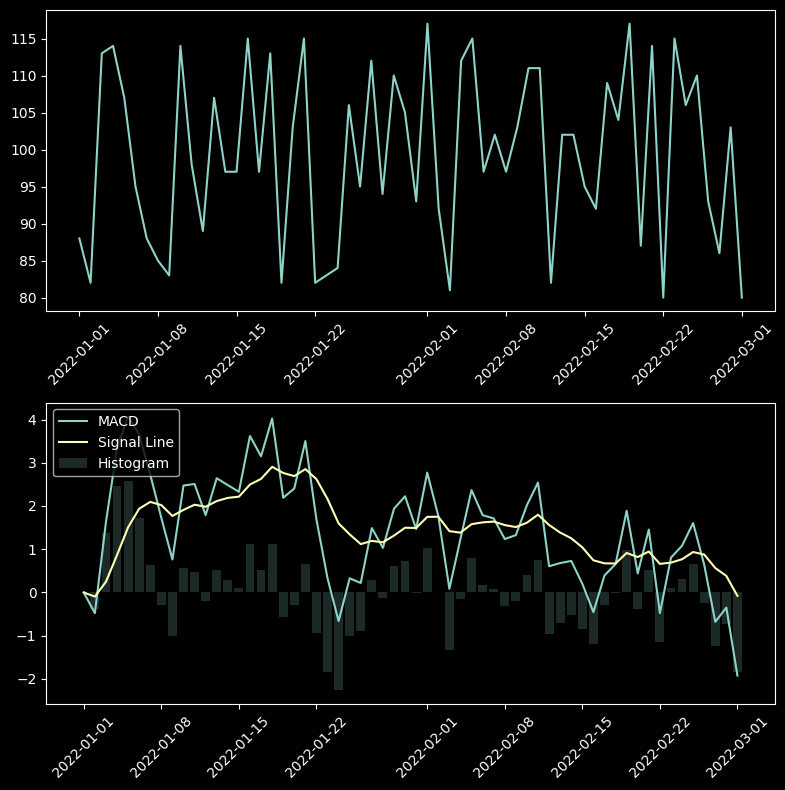

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generamos un dataframe con datos aleatorios
data = {'date': pd.date_range('2022-01-01', '2022-03-01')}
df = pd.DataFrame(data)
df['price'] = np.random.randint(80, 120, size=len(df))

# Calculamos las medias móviles exponenciales (EMA)
ema12 = df['price'].ewm(span=12, adjust=False).mean()
ema26 = df['price'].ewm(span=26, adjust=False).mean()

# Calculamos la línea MACD
macd_line = ema12 - ema26

# Calculamos la señal MACD
signal_line = macd_line.ewm(span=9, adjust=False).mean()

# Calculamos el histograma
histogram = macd_line - signal_line

# Ploteamos los resultados
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].plot(df['date'], df['price'], label='Price')
ax[1].plot(df['date'], macd_line, label='MACD')
ax[1].plot(df['date'], signal_line, label='Signal Line')
ax[1].bar(df['date'], histogram, label='Histogram', alpha=0.2)
ax[0].tick_params(axis="x", labelrotation=45)
ax[1].tick_params(axis="x", labelrotation=45)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

---
### Medias móviles y cruces

Medias móviles (Moving Averages):

La media móvil es uno de los indicadores más utilizados en el análisis técnico. Una media móvil es un promedio de los precios de cierre de una acción durante un período determinado. El período puede ser de cualquier longitud, dependiendo del objetivo del analista. Las medias móviles suavizan las fluctuaciones de los precios y pueden ayudar a identificar tendencias a largo plazo.

El cruce de medias móviles se produce cuando la media móvil de corto plazo (por ejemplo, 50 días) cruza por encima o por debajo de la media móvil a largo plazo (por ejemplo, 200 días). Un cruce alcista, cuando la media móvil de corto plazo cruza por encima de la media móvil a largo plazo, es considerado una señal de compra. Por el contrario, un cruce bajista, cuando la media móvil de corto plazo cruza por debajo de la media móvil a largo plazo, es considerado una señal de venta.


---

In [11]:
import yfinance as yf
import ta

# Obtener los datos de cierre de AAPL
data = yf.download("AAPL")

# 5 años
df_short = data["2018-03-27":"2023-03-27"]

# Media movil de 50 dias
df_short['SMA50'] = ta.trend.sma_indicator(df_short['Close'], window=50)

# Media móvil de 100 días
df_short['SMA100'] = ta.trend.sma_indicator(df_short['Close'], window=100)

# Mostrar los últimos 5 registros
df_short.tail()

[*********************100%***********************]  1 of 1 completed


C:\Users\kuens\AppData\Local\Temp\ipykernel_17220\237140131.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['SMA50'] = ta.trend.sma_indicator(df_short['Close'], window=50)
C:\Users\kuens\AppData\Local\Temp\ipykernel_17220\237140131.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['SMA100'] = ta.trend.sma_indicator(df_short['Close'], window=100)


,Open,High,Low,Close,Adj Close,Volume,SMA50,SMA100
Date,,,,,,,,
2023-03-21,157.320007,159.399994,156.539993,159.279999,159.279999,73938300,147.2226,144.285499
2023-03-22,159.300003,162.139999,157.809998,157.830002,157.830002,75701800,147.7762,144.370299
2023-03-23,158.830002,161.550003,157.679993,158.929993,158.929993,67622100,148.3402,144.511599
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500,148.8754,144.556699
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52264369,149.3728,144.606099


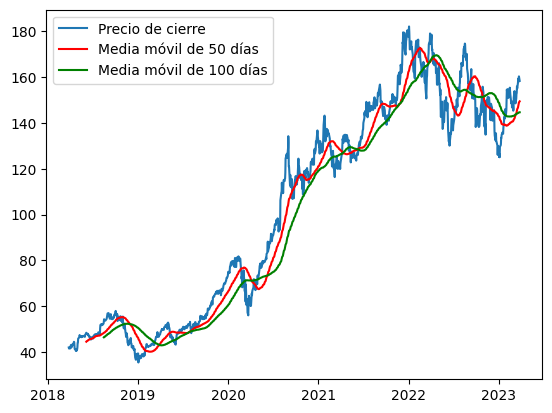

In [14]:
import matplotlib.pyplot as plt


# Graficar los precios de cierre y la media móvil de 50 días
plt.plot(df_short['Close'], label='Precio de cierre')
plt.plot(df_short['SMA50'], label='Media móvil de 50 días', color='red')
plt.plot(df_short['SMA100'], label='Media móvil de 100 días', color='green')
plt.legend()
plt.show()

---
### Índice de Fuerza Relativa (RSI):


 El RSI es un indicador de impulso que mide la fuerza de la tendencia alcista o bajista de una acción y se expresa en una escala de 0 a 100. Un RSI por encima de 70 indica que la acción está sobrecomprada, lo que significa que el precio ha subido demasiado rápido y puede estar a punto de corregir a la baja. Un RSI por debajo de 30 indica que la acción está sobrevendida, lo que significa que el precio ha caído demasiado rápido y puede estar a punto de corregir al alza. El RSI también se puede utilizar para identificar divergencias entre el precio y el impulso, lo que puede ser una señal de una posible inversión de la tendencia.

**Que quiere decir sobreventa o sobrecompra??**

La interpretación de los indicadores de sobrecompra y sobreventa no es tan simple como indicar que una acción sobrecomprada es una señal de venta y una acción sobrevendida es una señal de compra.

Por ejemplo, en el caso del RSI (Relative Strength Index), que es un indicador técnico muy utilizado, si el valor del RSI es superior a 70, se considera que la acción está sobrecomprada, lo que significa que la acción ha subido mucho en poco tiempo y es posible que esté sobrevalorada. Sin embargo, esto no siempre significa que la acción deba venderse, ya que el precio de una acción puede seguir subiendo incluso después de que el RSI alcance un valor de 70.

Por otro lado, si el RSI es inferior a 30, se considera que la acción está sobrevendida, lo que significa que la acción ha caído mucho en poco tiempo y es posible que esté infravalorada. Sin embargo, esto tampoco significa que la acción deba comprarse necesariamente, ya que una acción puede seguir cayendo incluso después de que el RSI alcance un valor de 30.

---

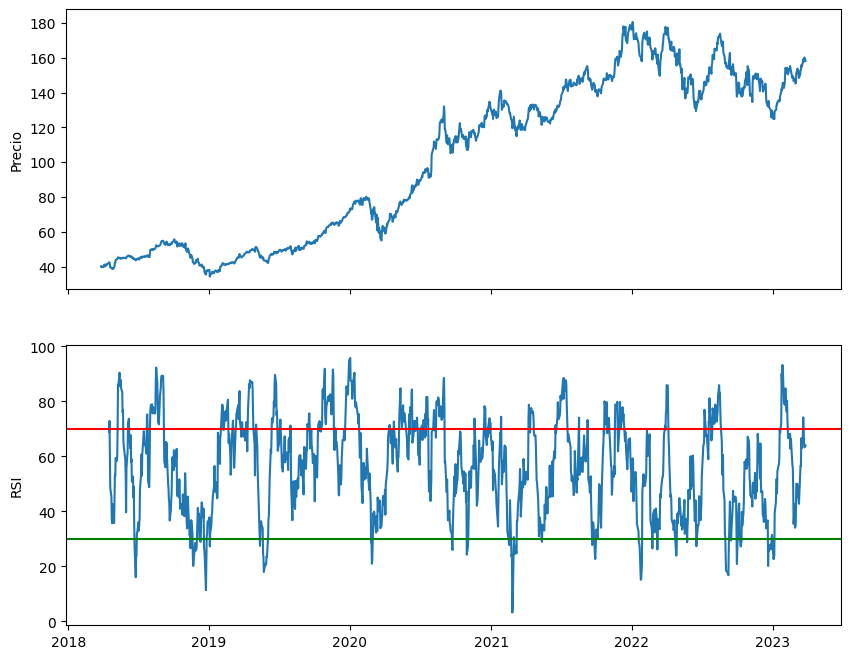

In [16]:
data["RSI"] = ta.momentum.rsi(data["Close"], window=14)



# Calcular el RSI con un período de 14 días
delta = df_short['Adj Close'].diff()
gain = delta.mask(delta<0,0)
loss = -delta.mask(delta>0,0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100.0 - (100.0 / (1.0 + rs))

# Graficar los precios y el RSI
fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)
ax[0].plot(df_short.index, df_short['Adj Close'])
ax[0].set_ylabel('Precio')
ax[1].plot(rsi.index, rsi)
ax[1].set_ylabel('RSI')
ax[1].axhline(y=30, color='g', linestyle='-')
ax[1].axhline(y=70, color='r', linestyle='-')
plt.show()

---
### Nube Ichimoku (Ichimoku Cloud): 

El Ichimoku Cloud es un indicador de tendencia basado en cinco líneas, que se utilizan para medir el impulso y la dirección de una tendencia, así como para proporcionar señales de compra y venta. El indicador se compone de una nube (o kumo), que representa el soporte y la resistencia, y de dos líneas adicionales, la línea Tenkan Sen (roja) y la línea Kijun Sen (azul). Cuando la línea Tenkan Sen cruza por encima de la línea Kijun Sen, se considera una señal de compra, mientras que un cruce bajista se produce cuando la línea Tenkan Sen cruza por debajo de la línea Kijun Sen. La nube, por su parte, puede actuar como soporte o resistencia, según si los precios están por encima o por debajo de ella.

---

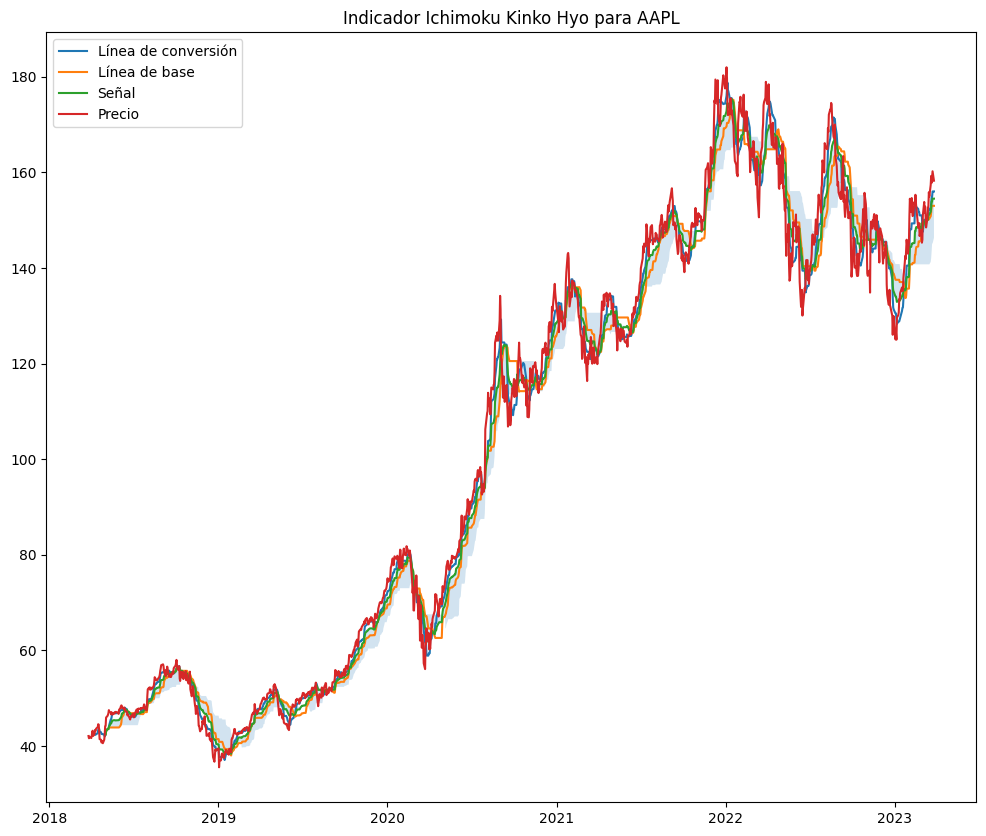

In [20]:
ichimoku = ta.trend.IchimokuIndicator(high=df_short["High"], low=df_short["Low"])


plt.figure(figsize=(12,10))
plt.fill_between(df_short.index, ichimoku.ichimoku_b(), ichimoku.ichimoku_a(), alpha=0.2)


# Graficar la línea de conversión y la línea de base
plt.plot(df_short.index, ichimoku.ichimoku_conversion_line(), label="Línea de conversión")
plt.plot(df_short.index, ichimoku.ichimoku_base_line(), label="Línea de base")

# Graficar la señal
plt.plot(df_short.index, ichimoku.ichimoku_a(), label="Señal")

# Graficar los precios
plt.plot(df_short.index, df_short["Close"], label="Precio")

# Configurar la leyenda y el título del gráfico
plt.legend()
plt.title("Indicador Ichimoku Kinko Hyo para AAPL")

# Mostrar el gráfico
plt.show()